$$
  \text{Fundamentals of Robotics — Assignment} \\
  \text{Valeria Neganova — RO-1} \\
  \text{2025}
$$

---



### Spherical Manipulator zxz

Manipulator model with zxz spherical wrist

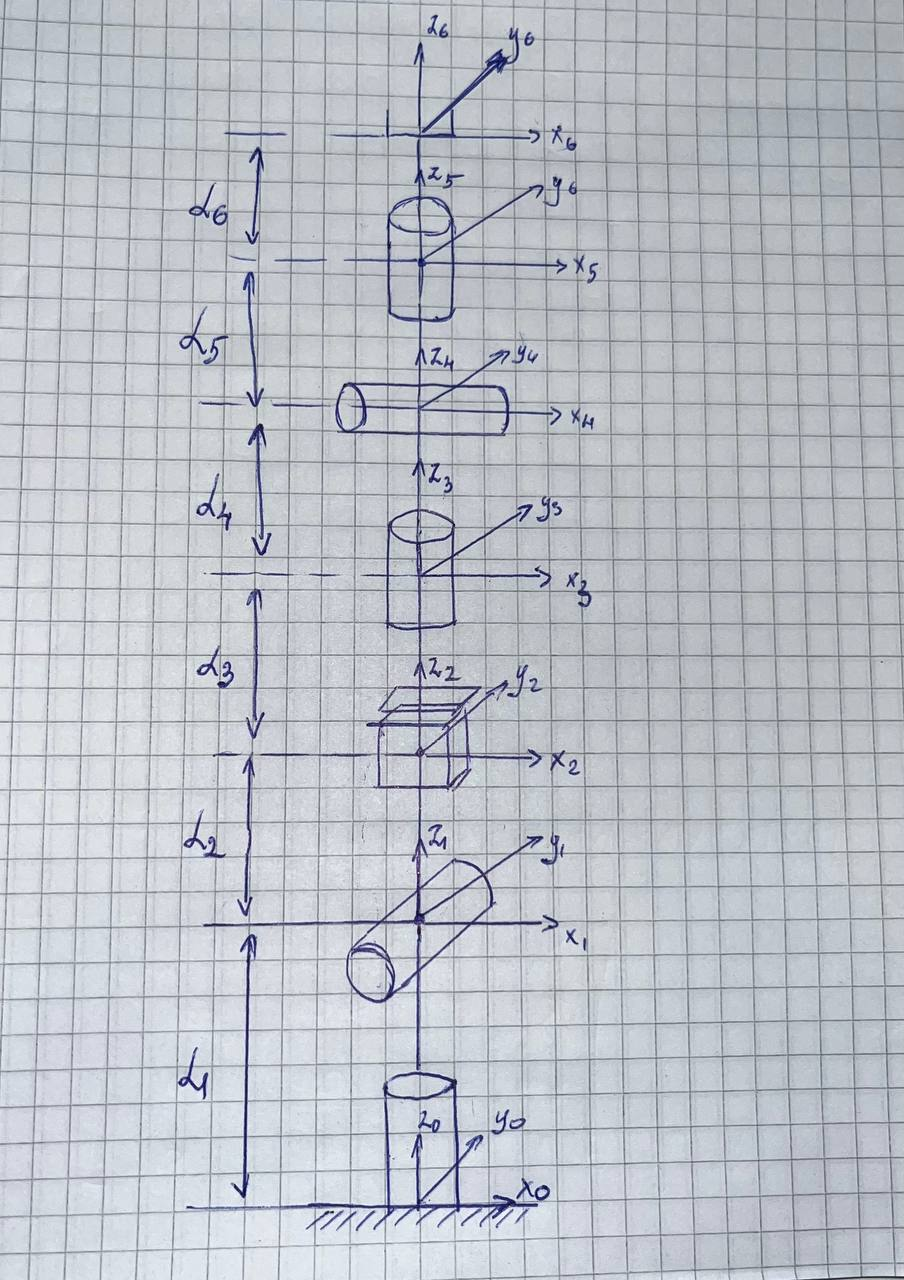

### Forward kinematics

$$
{}^0T_6 = R_z({\theta_1})R_y({\theta_2})T_z(d_3)R_z({\theta_4})R_x({\theta_5})R_z({\theta_6})
$$

General form of rotation and translation matricies:

$$ R_z({\theta_i}) =
\begin{bmatrix}
\cos{\theta_i} & -\sin{\theta_i} & 0 & 0 \\
\sin{\theta_i} & \cos{\theta_i} & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

$$ T_z(d_i) =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & d_i \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

$$R_x({\theta_i}) =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & \cos{\alpha_i} & -\sin{\alpha_i} & 0 \\
0 & \sin{\alpha_i} & \cos{\alpha_i} & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

$$R_y({\theta_i})
\begin{bmatrix}
\cos{\theta_i} & 0 & -\sin{\theta_i} & 0 \\
0 & 1 & 0 & 0 \\
\sin{\theta_i} & 0 & \cos{\theta_i} & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

#### Write each movement in matrix form:

#### Arm

$$T_{arm} = {^0T_1 ^1T_2 ^2T_3} =  R_z({\theta_1})R_y({\theta_2})T_z(d_3) $$

$$
^0T_1 = T({\theta_1}, L_1)
\begin{bmatrix}
\cos\theta_1 & -\sin\theta_1 & 0 & 0 \\
\sin\theta_1 & \cos\theta_1 & 0 & 0 \\
0 & 0 & 1 & L_1 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$



$$
^1T_2 = T({\theta_2}, L_2)
\begin{bmatrix}
\cos\theta_2 & 0 & -\sin\theta_2 & 0 \\
0 & 1 & 0 & 0 \\
\sin\theta_2 & 0 & \cos\theta_2 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix} \cdot \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & L_2 \\
0 & 0 & 0 & 1
\end{bmatrix} = \begin{bmatrix}
\cos(\theta_2) & 0 & -\sin(\theta_2) & -L_2\sin(\theta_2) \\
0 & 1 & 0 & 0 \\
\sin(\theta_2) & 0 & \cos(\theta_2) & L_2\cos(\theta_2) \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

$$
^2T_3 = T(d_3, L_3)
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & d_3 + L_3 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

#### Spherical wrist

$$T_{wrist} =  {^3T_4 ^4T_5 ^5T_6} =  R_z({\theta_4})R_x({\theta_5})R_z({\theta_6}) $$

$$
^3T_4 = T({\theta_4}, L_4)
\begin{bmatrix}
\cos\theta_4 & -\sin\theta_4 & 0 & 0 \\
\sin\theta_4 & \cos\theta_4 & 0 & 0 \\
0 & 0 & 1 & L_4 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$


$$
^4T_5 = T({\theta_5}, L_5)
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & \cos\theta_5 & -\sin\theta_5 & 0 \\
0 & \sin\theta_5 & \cos\theta_5 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix} \cdot \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & L_5 \\
0 & 0 & 0 & 1
\end{bmatrix} = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & \cos(\alpha) & -\sin(\alpha) & -L_5\sin(\alpha) \\
0 & \sin(\alpha) & \cos(\alpha) & L_5\cos(\alpha) \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

$$
^5T_6 = T({\theta_6}, L_6)
\begin{bmatrix}
\cos\theta_6 & -\sin\theta_6 & 0 & 0 \\
\sin\theta_6 & \cos\theta_6 & 0 & 0 \\
0 & 0 & 1 & L_6 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$


### Final Forward Kinematics
$$
T_0^6 = T_0^1 \cdot T_1^2 \cdot T_2^3 \cdot T_3^4 \cdot T_4^5 \cdot T_5^6
$$

*For computing final answer we can use python code*

In [ ]:
import sympy as sp

θ1, θ2, θ3, θ4, θ5, θ6 = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6')
L1, L2, L3, L4, L5, L6 = sp.symbols('L1 L2 L3 L4 L5 L6')
d3 = sp.Symbol('d3')

T01 = sp.Matrix([
    [sp.cos(θ1), -sp.sin(θ1), 0, 0],
    [sp.sin(θ1),  sp.cos(θ1), 0, 0],
    [0,           0,          1, L1],
    [0,           0,          0, 1]
])

T12 = sp.Matrix([
    [sp.cos(θ2), 0, -sp.sin(θ2), -L2 * sp.sin(θ2)],
    [0, 1, 0, 0],
    [sp.sin(θ2), 0, sp.cos(θ2), L2 * sp.cos(θ2)],
    [0, 0, 0, 1]
])

T23 = sp.Matrix([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, d3 + L3],
    [0, 0, 0, 1]
])

T34 = sp.Matrix([
    [sp.cos(θ4), -sp.sin(θ4), 0, 0],
    [sp.sin(θ4),  sp.cos(θ4), 0, 0],
    [0,           0,          1, L4],
    [0,           0,          0, 1]
])

T45 = sp.Matrix([
    [1, 0, 0, 0],
    [0, sp.cos(θ5), -sp.sin(θ5), -L5 * sp.sin(θ5)],
    [0, sp.sin(θ5),  sp.cos(θ5),  L5 * sp.cos(θ5)],
    [0, 0, 0, 1]
])

T56 = sp.Matrix([
    [sp.cos(θ6), -sp.sin(θ6), 0, 0],
    [sp.sin(θ6),  sp.cos(θ6), 0, 0],
    [0,           0,          1, L6],
    [0, 0, 0, 1]
])


T06 = T01 * T12 * T23 * T34 * T45 * T56
T06 = sp.simplify(T06)


for row in T06.tolist():
    formatted_row = f"| {sp.pretty(row[0]):^20} | {sp.pretty(row[1]):^20} | {sp.pretty(row[2]):^20} | {sp.pretty(row[3]):^20} !!!!"
    print(formatted_row)



| -((sin(θ₁)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₁)⋅cos(θ₂))⋅cos(θ₅) + sin(θ₂)⋅sin(θ₅)⋅cos(θ₁ ↪

↪ ))⋅sin(θ₆) - (sin(θ₁)⋅sin(θ₄) - cos(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₆) | -((sin(θ₁)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₁)⋅cos(θ₂))⋅cos(θ₅) + sin(θ₂)⋅sin(θ₅)⋅cos(θ₁ ↪

↪ ))⋅cos(θ₆) + (sin(θ₁)⋅sin(θ₄) - cos(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅sin(θ₆) | (sin(θ₁)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₁)⋅cos(θ₂))⋅sin(θ₅) - sin(θ₂)⋅cos(θ₁)⋅cos(θ₅) | -L₂⋅sin(θ₂)⋅cos(θ₁) - L₄⋅sin(θ₂)⋅cos(θ₁) + L₅⋅(sin(θ₁)⋅cos(θ₄) + sin(θ₄)⋅cos(θ ↪

↪ ₁)⋅cos(θ₂))⋅sin(θ₅) - L₅⋅sin(θ₂)⋅cos(θ₁)⋅cos(θ₅) + L₆⋅((sin(θ₁)⋅cos(θ₄) + si ↪

↪ n(θ₄)⋅cos(θ₁)⋅cos(θ₂))⋅sin(θ₅) - sin(θ₂)⋅cos(θ₁)⋅cos(θ₅)) - (L₃ + d₃)⋅sin(θ₂ ↪

↪ )⋅cos(θ₁) !!!!
| -((sin(θ₁)⋅sin(θ₄)⋅cos(θ₂) - cos(θ₁)⋅cos(θ₄))⋅cos(θ₅) + sin(θ₁)⋅sin(θ₂)⋅sin(θ₅ ↪

↪ ))⋅sin(θ₆) + (sin(θ₁)⋅cos(θ₂)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₁))⋅cos(θ₆) | -((sin(θ₁)⋅sin(θ₄)⋅cos(θ₂) - cos(θ₁)⋅cos(θ₄))⋅cos(θ₅) + sin(θ₁)⋅sin(θ₂)⋅sin(θ₅ ↪

↪ ))⋅cos(θ₆) - (sin(θ₁)⋅cos(θ₂)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₁))⋅sin(θ₆) | (sin(θ₁)⋅sin(θ₄)⋅cos(θ₂) - cos(θ₁)⋅cos(θ₄))⋅sin(θ




$${}^0_6T =
\begin{bmatrix}
-c_6(c_1 s_2 s_5 - c_5(c_1 c_2 c_4 - s_1 s_4)) - s_6(c_1 c_2 s_4 + c_4 s_1) &
-c_6(c_1 c_2 s_4 + c_4 s_1) + s_6(c_1 s_2 s_5 - c_5(c_1 c_2 c_4 - s_1 s_4)) &
c_1 c_5 s_2 + s_5(c_1 c_2 c_4 - s_1 s_4) &
10 c_1 c_5 s_2 (d_3 + 5) + 10 c_1 s_2 + 10 s_5(c_1 c_2 c_4 - s_1 s_4) \\
-c_6(c_1 s_4 + c_2 c_4 s_1) - s_1 s_2 s_5 + s_6(c_1 c_4 - c_2 s_1 s_4) &
s_6(c_1 s_4 + c_2 c_4 s_1) - c_5 s_1 s_2 - c_6(c_1 c_4 - c_2 s_1 s_4) &
c_5 s_1 s_2 + s_5(c_1 s_4 + c_2 c_4 s_1) &
10 s_1 s_2 + 10 s_5(c_1 s_4 + c_2 c_4 s_1) \\
-c_6(c_2 s_5 + c_4 c_5 s_2) + s_2 s_4 s_6 &
c_6 s_2 s_4 + s_6(c_2 s_5 + c_4 c_5 s_2) &
c_2 c_5 - c_4 s_2 s_5 &
c_2 c_5 + c_2 d_3 + 15 c_2 - 10 c_4 s_2 s_5 + 5 \\
0 & 0 & 0 & 1
\end{bmatrix}$$

### Analyze the workspace and reachability of the robot

I consider 2 cases:

1. 180 degrees of rotation(code and vidio for it below) - such approach helps to examine the robot's sphere from the inside (thanks to the 180-degree cut)
2. 360 degrees of rotation



In [3]:
import numpy as np
#import pyvista as pv


angles = np.linspace(0, np.pi, 12)


d3_val = np.linspace(0, 10,2)


L1, L2, L3 = 10, 10, 10
L4, L5, L6 = 5, 5, 5


positions = []


for theta1 in angles:
    for theta2 in angles:
        for d3 in d3_val:
            for theta4 in angles:
                for theta5 in angles:
                    for theta6 in angles:



                        T01 = np.array([
                            [np.cos(theta6), -np.sin(theta6), 0, 0],
                            [np.sin(theta6),  np.cos(theta6), 0, 0],
                            [0,               0,              1, L1],
                            [0,               0,              0, 1]
                        ])

                        T12 = np.array([
                            [np.cos(theta5), 0, -np.sin(theta5), -L2 * np.sin(theta5)],
                            [0,              1, 0,              0],
                            [np.sin(theta5),0, np.cos(theta5), L2 * np.cos(theta5)],
                            [0,              0, 0,              1]
                        ])

                        T23 = np.array([
                            [1, 0, 0, 0],
                            [0, 1, 0, 0],
                            [0, 0, 1, d3 + L3],
                            [0, 0, 0, 1]
                        ])

                        T34 = np.array([
                            [np.cos(theta4), -np.sin(theta4), 0, 0],
                            [np.sin(theta4),  np.cos(theta4), 0, 0],
                            [0,               0,              1, L4],
                            [0, 0, 0, 1]
                        ])

                        T45 = np.array([
                            [1, 0, 0, 0],
                            [0, np.cos(theta2), -np.sin(theta2), -L5 * np.sin(theta2)],
                            [0, np.sin(theta2),  np.cos(theta2),  L5 * np.cos(theta2)],
                            [0, 0, 0, 1]
                        ])

                        T56 = np.array([
                            [np.cos(theta1), -np.sin(theta1), 0, 0],
                            [np.sin(theta1),  np.cos(theta1), 0, 0],
                            [0,               0,              1, L6],
                            [0, 0, 0, 1]
                        ])


                        T = T01 @ T12 @ T23 @ T34 @ T45 @ T56
                        pos = T @ np.array([[0], [0],[0] , [1]])
                        pos = np.transpose(pos[:-1,:])[0]
                        positions.append(pos)


positions = np.array(positions)
print(angles)

#point_cloud = pv.PolyData(positions)

#plotter = pv.Plotter()
#plotter.add_mesh(point_cloud, color="red", point_size=5, render_points_as_spheres=True)
#plotter.add_axes()
#plotter.show_bounds(grid='front', location='outer', all_edges=True)
#plotter.show()


[0.         0.28559933 0.57119866 0.856798   1.14239733 1.42799666
 1.71359599 1.99919533 2.28479466 2.57039399 2.85599332 3.14159265]


NameError: name 'pv' is not defined



[Link for vidio](https://drive.google.com/file/d/1iBGmHDnzGe4H7KdsNuNTcntkovkjYRU9/view?usp=sharing)


Photo 360 degrees:
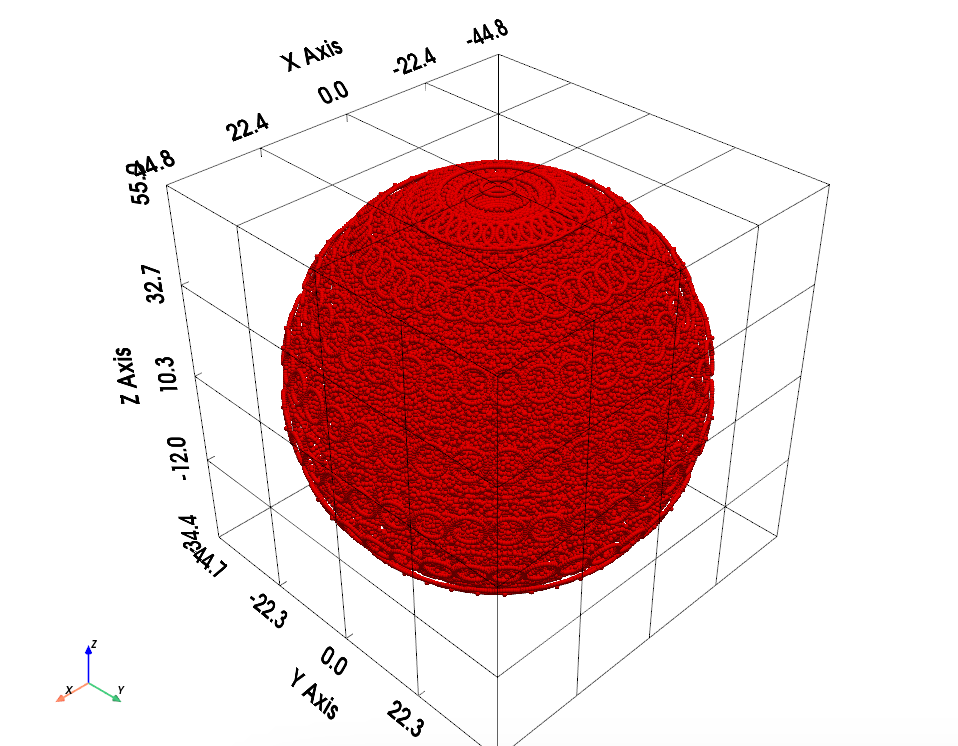

### Inverse kinematics

For finding inverse kinematics I use Pieper's method

 I already have matrix with position of end-effector ${}^0_6T$

 Matrix of end-effector in general form $${}^0T_6 =
\begin{bmatrix}
r_{11} & r_{12} & r_{13} & x \\
r_{21} & r_{22} & r_{23} & y \\
r_{31} & r_{32} & r_{33} & z \\
0      & 0      & 0      & 1
\end{bmatrix}
=
\begin{bmatrix}
R_{3 \times 3} & P_{3 \times 1} \\
0\ 0\ 0 & 1
\end{bmatrix}$$

1. Calculate wrist center $P_c = {}^0_6d -  d_6\cdot Z_6$, where ${}^0_6d$ - last column of ${}^0T_6$, $Z_6$ - 3'd column of ${}^0T_6$, $d_6$ - tool offset length

$$d_6 = O_5 - z_5 \cap x_6  = L_5 + L_6 = 10$$

Let's take random matrix for forward kinematics for end-effector:





In [ ]:
import sympy as sp
import math

θ1, θ2, θ3, θ4, θ5, θ6 = map(math.radians, [30, 45, 0, 60, 90, 120])
L1, L2, L3 = 10, 10, 10
L4, L5, L6 = 5, 5, 5
d3 = 5

T01 = sp.Matrix([
    [sp.cos(θ1), -sp.sin(θ1), 0, 0],
    [sp.sin(θ1),  sp.cos(θ1), 0, 0],
    [0,           0,          1, L1],
    [0,           0,          0, 1]
])

T12 = sp.Matrix([
    [sp.cos(θ2), 0, -sp.sin(θ2), -L2 * sp.sin(θ2)],
    [0, 1, 0, 0],
    [sp.sin(θ2), 0, sp.cos(θ2), L2 * sp.cos(θ2)],
    [0, 0, 0, 1]
])

T23 = sp.Matrix([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, d3 + L3],
    [0, 0, 0, 1]
])

T34 = sp.Matrix([
    [sp.cos(θ4), -sp.sin(θ4), 0, 0],
    [sp.sin(θ4),  sp.cos(θ4), 0, 0],
    [0,           0,          1, L4],
    [0,           0,          0, 1]
])

T45 = sp.Matrix([
    [1, 0, 0, 0],
    [0, sp.cos(θ5), -sp.sin(θ5), -L5 * sp.sin(θ5)],
    [0, sp.sin(θ5),  sp.cos(θ5),  L5 * sp.cos(θ5)],
    [0, 0, 0, 1]
])

T56 = sp.Matrix([
    [sp.cos(θ6), -sp.sin(θ6), 0, 0],
    [sp.sin(θ6),  sp.cos(θ6), 0, 0],
    [0,           0,          1, L6],
    [0, 0, 0, 1]
])


T06 = T01 * T12 * T23 * T34 * T45 * T56
T06 = sp.simplify(T06)


for row in T06.tolist():
    formatted_row = f"| {sp.pretty(row[0]):^20} | {sp.pretty(row[1]):^20} | {sp.pretty(row[2]):^20} | {sp.pretty(row[3]):^20} "
    print(formatted_row)



|  -0.466916843867750  |  0.416021174902942   |  0.780330085889911   |  -10.5678722119747   
|  -0.769574565496215  |  -0.625835466465641  |  -0.126826484044322  |  -11.8748665582414   
|  0.435595740399158   |  -0.659739608441171  |  0.612372435695794   |   37.3369277925544   
|          0           |          0           |          0           |          1           


$$T_6^0 =
\begin{bmatrix}
-0.4669 & 0.4160  & 0.7803  & -10.5679 \\
-0.7696 & -0.6258 & -0.1268 & -11.8749 \\
 0.4356 & -0.6597 & 0.6124  &  37.3369
\end{bmatrix}$$

where $$\text{coordinates of end-effector} -
\begin{bmatrix}
 -10.5679 \\
 -11.8749 \\
    37.3369 \
\end{bmatrix}$$

$$\text{rotation} -
\begin{bmatrix}
-0.4669 & 0.4160  & 0.7803   \\
-0.7696 & -0.6258 & -0.1268  \\
 0.4356 & -0.6597 & 0.6124  
\end{bmatrix}$$


$$P_c = \begin{bmatrix}
 -10.5679 \\
 -11.8749 \\
    37.3369
\end{bmatrix} - 10 \cdot \begin{bmatrix}
 0.7803 \\
 -0.1268 \\
   0.6124
\end{bmatrix}= \begin{bmatrix}
-18.3709 \\
-10.6069 \\
31.2129
\end{bmatrix}$$

2. Knowing center of wrist, calculate $\theta_1, \theta_2 ,\theta_3$.  $P_c$ = last column of ${^0T_3}$

  Find ${^0T_3}$ matrix by ${^0T_1} \cdot {^1T_2} \cdot {^2T_3}$ and also we add to ${^0T_3}$ matrix length $L_4$ - distance from arm to center of the wrist:

  $$ \begin{bmatrix}
\cos\theta_1 & -\sin\theta_1 & 0 & 0 \\
\sin\theta_1 & \cos\theta_1 & 0 & 0 \\
0 & 0 & 1 & L_1 \\
0 & 0 & 0 & 1
\end{bmatrix} \cdot  \begin{bmatrix}
\cos(\theta_2) & 0 & -\sin(\theta_2) & -L_2\sin(\theta_2) \\
0 & 1 & 0 & 0 \\
\sin(\theta_2) & 0 & \cos(\theta_2) & L_2\cos(\theta_2) \\
0 & 0 & 0 & 1
\end{bmatrix} \cdot \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & d_3 + L_3 \\
0 & 0 & 0 & 1
\end{bmatrix} \cdot \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 &  L_4 \\
0 & 0 & 0 & 1
\end{bmatrix}$$

In [ ]:


θ1, θ2, θ3, θ4, θ5, θ6 = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6')
L1, L2, L3 = 10, 10, 10
L4, L5, L6 = 5, 5, 5
d3 = 5


T01 = sp.Matrix([
    [sp.cos(θ1), -sp.sin(θ1), 0, 0],
    [sp.sin(θ1),  sp.cos(θ1), 0, 0],
    [0,           0,          1, L1],
    [0,           0,          0, 1]
])

T12 = sp.Matrix([
    [sp.cos(θ2), 0, -sp.sin(θ2), -L2 * sp.sin(θ2)],
    [0, 1, 0, 0],
    [sp.sin(θ2), 0, sp.cos(θ2), L2 * sp.cos(θ2)],
    [0, 0, 0, 1]
])

T23 = sp.Matrix([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, d3 + L3 + L4],
    [0, 0, 0, 1]
])




T03 = T01 * T12 * T23
T03 = sp.simplify(T03)


for row in T03.tolist():
    formatted_row = f"| {sp.pretty(row[0]):^20} | {sp.pretty(row[1]):^20} | {sp.pretty(row[2]):^20} | {sp.pretty(row[3]):^20} |"
    print(formatted_row)



|   cos(θ₁)⋅cos(θ₂)    |       -sin(θ₁)       |   -sin(θ₂)⋅cos(θ₁)   | -30⋅sin(θ₂)⋅cos(θ₁)  |
|   sin(θ₁)⋅cos(θ₂)    |       cos(θ₁)        |   -sin(θ₁)⋅sin(θ₂)   | -30⋅sin(θ₁)⋅sin(θ₂)  |
|       sin(θ₂)        |          0           |       cos(θ₂)        |   30⋅cos(θ₂) + 10    |
|          0           |          0           |          0           |          1           |


$$T_{03} =
\begin{bmatrix}
\cos(\theta_1)\cos(\theta_2) & -\sin(\theta_1) & -\sin(\theta_2)\cos(\theta_1) & -30\sin(\theta_2)\cos(\theta_1) \\
\sin(\theta_1)\cos(\theta_2) & \cos(\theta_1)  & -\sin(\theta_1)\sin(\theta_2) & -30\sin(\theta_1)\sin(\theta_2) \\
\sin(\theta_2)               & 0               & \cos(\theta_2)               & 30\cos(\theta_2) + 10
\end{bmatrix}$$

$$\begin{bmatrix}
-18.3709 \\
-10.6069 \\
31.2129
\end{bmatrix} = \begin{bmatrix}
-30 \sin(\theta_2) \cos(\theta_1) \\
-30\sin(\theta_1) \sin(\theta_2) \\
30 \cos(\theta_2) + 10
\end{bmatrix}$$

Let's find $\theta_1, \theta_2,\theta_3$:

$ \theta_3 = 0  $

Find $\theta_2$:


$30 \cos(\theta_2) + 10 = 31.2129
\Rightarrow
\cos(\theta_2) = \frac{31.2129 - 10}{30} = \frac{21.2129}{30} \approx 0.7071$

$\sin(\theta_2) = \sqrt{1 - \cos^2(\theta_2)} = \sqrt{1 - 0.7071^2} \approx 0.7071$

$\theta_2 = \operatorname{atan2}(0.7071,\ 0.7071) \approx 45^\circ$

Find $\theta_1$:

$y = -30 \sin(\theta_2) \sin(\theta_1) = -10.6069$

$\sin(\theta_1) = \frac{-10.6069}{-30 \cdot 0.7071} \approx \frac{10.6069}{21.213} \approx 0.5000$

$\cos(\theta_1) = \frac{-18.3709}{-30 \cdot 0.7071} \approx \frac{18.3709}{21.213} \approx 0.8660 $

$\theta_1 = \operatorname{atan2}(0.5000,\ 0.8660) \approx 30^\circ$


#### Find $R_6^3 $

$R_6^3 = {R_0^3}^{-1}\cdot {R_0^6}$

**we extract only rotation matricies*

Firstly, find numericaly $R_6^3 $:

In [2]:
import numpy as np

theta1 = np.radians(30)
theta2 = np.radians(45)

R03 = np.array([
    [np.cos(theta1)*np.cos(theta2), -np.sin(theta1), -np.cos(theta1)*np.sin(theta2)],
    [np.sin(theta1)*np.cos(theta2),  np.cos(theta1), -np.sin(theta1)*np.sin(theta2)],
    [np.sin(theta2),                 0,               np.cos(theta2)]
])

R06 = np.array([
    [-0.466916848367750,  0.416021174902942,  0.780330085889911],
    [-0.769574565496215, -0.625835466465641, -0.126826484044322],
    [ 0.435595740399158, -0.659739608441171,  0.612372435695794]
])

R03_inv = np.linalg.inv(R03)

R36 = R03_inv @ R06

print(np.round(R36, 4))


[[-0.25  -0.433  0.866]
 [-0.433 -0.75  -0.5  ]
 [ 0.866 -0.5   -0.   ]]


Calculate matrix $R_6^3$ in general form with $\theta_4, \theta_5, \theta_6$

In [ ]:
import sympy as sp

θ1, θ2, θ3, θ4, θ5, θ6 = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6')
L1, L2, L3 = 10, 10, 10
L4, L5, L6 = 5, 5, 5
d3 = 5

T01 = sp.Matrix([
    [sp.cos(θ1), -sp.sin(θ1), 0, 0],
    [sp.sin(θ1),  sp.cos(θ1), 0, 0],
    [0,           0,          1, L1],
    [0,           0,          0, 1]
])

T12 = sp.Matrix([
    [sp.cos(θ2), 0, -sp.sin(θ2), -L2 * sp.sin(θ2)],
    [0, 1, 0, 0],
    [sp.sin(θ2), 0, sp.cos(θ2), L2 * sp.cos(θ2)],
    [0, 0, 0, 1]
])

T23 = sp.Matrix([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, d3 + L3],
    [0, 0, 0, 1]
])

T34 = sp.Matrix([
    [sp.cos(θ4), -sp.sin(θ4), 0, 0],
    [sp.sin(θ4),  sp.cos(θ4), 0, 0],
    [0, 0, 1, L4],
    [0,0,0, 1]
])

T45 = sp.Matrix([
    [1, 0, 0, 0],
    [0, sp.cos(θ5), -sp.sin(θ5), -L5 * sp.sin(θ5)],
    [0, sp.sin(θ5),  sp.cos(θ5),  L5 * sp.cos(θ5)],
    [0, 0, 0, 1]
])

T56 = sp.Matrix([
    [sp.cos(θ6), -sp.sin(θ6), 0, 0],
    [sp.sin(θ6),  sp.cos(θ6), 0, 0],
    [0,0,1, L6],
    [0, 0, 0, 1]
])


T46 =  T34 * T45 * T56
T46 = sp.simplify(T46)


for row in T46.tolist():
    formatted_row = f"| {sp.pretty(row[0]):^20} | {sp.pretty(row[1]):^20} | {sp.pretty(row[2]):^20} | "
    print(formatted_row)



| -sin(θ₄)⋅sin(θ₆)⋅cos(θ₅) + cos(θ₄)⋅cos(θ₆) | -sin(θ₄)⋅cos(θ₅)⋅cos(θ₆) - sin(θ₆)⋅cos(θ₄) |   sin(θ₄)⋅sin(θ₅)    | 
| sin(θ₄)⋅cos(θ₆) + sin(θ₆)⋅cos(θ₄)⋅cos(θ₅) | -sin(θ₄)⋅sin(θ₆) + cos(θ₄)⋅cos(θ₅)⋅cos(θ₆) |   -sin(θ₅)⋅cos(θ₄)   | 
|   sin(θ₅)⋅sin(θ₆)    |   sin(θ₅)⋅cos(θ₆)    |       cos(θ₅)        | 
|          0           |          0           |          0           | 


$\theta_4 = \operatorname{atan2}(0.8660 \ 0.5000) = 60^\circ$

$\theta_5 = 90^\circ$

$\theta_6 = \operatorname{atan2}(0.8660 \ -0.5000) = 120^\circ$


All results are equal to inital conditions, hence we did all right


#### Now we define 50 random joints and check formula of inverse kinematics

In [ ]:
import math
import random
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class RobotArm:
    def __init__(self):

        self.L1, self.L2, self.L3 = 10, 10, 10
        self.L4, self.L5, self.L6 = 5, 5, 5
        self.d3 = 5

        self.theta1, self.theta2, self.theta3, self.theta4, self.theta5, self.theta6 = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6', real=True)

        self.T01 = sp.Matrix([
            [sp.cos(self.theta1), -sp.sin(self.theta1), 0, 0],
            [sp.sin(self.theta1),  sp.cos(self.theta1), 0, 0],
            [0,0,1, self.L1],
            [0,0,0, 1]
        ])

        self.T12 = sp.Matrix([
            [sp.cos(self.theta2), 0, -sp.sin(self.theta2), -self.L2 * sp.sin(self.theta2)],
            [0, 1, 0, 0],
            [sp.sin(self.theta2), 0, sp.cos(self.theta2), self.L2 * sp.cos(self.theta2)],
            [0, 0, 0, 1]
        ])

        self.T23 = sp.Matrix([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, self.d3 + self.L3],
            [0, 0, 0, 1]
        ])

        self.T34 = sp.Matrix([
            [sp.cos(self.theta4), -sp.sin(self.theta4), 0, 0],
            [sp.sin(self.theta4),  sp.cos(self.theta4), 0, 0],
            [0,0,1, self.L4],
            [0,0,0, 1]
        ])

        self.T45 = sp.Matrix([
            [1, 0, 0, 0],
            [0, sp.cos(self.theta5), -sp.sin(self.theta5), -self.L5 * sp.sin(self.theta5)],
            [0, sp.sin(self.theta5),  sp.cos(self.theta5), self.L5 * sp.cos(self.theta5)],
            [0, 0, 0, 1]
        ])

        self.T56 = sp.Matrix([
            [sp.cos(self.theta6), -sp.sin(self.theta6), 0, 0],
            [sp.sin(self.theta6),  sp.cos(self.theta6), 0, 0],
            [0,                   0,                  1, self.L6],
            [0, 0, 0, 1]
        ])


        self.T06_symbolic = sp.simplify(self.T01 * self.T12 * self.T23 * self.T34 * self.T45 * self.T56)


        self.current_joints = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

    def forward_kinematics(self, joints):

        self.current_joints = joints

        subs_dict = {
            self.theta1: joints[0],
            self.theta2: joints[1],
            self.theta3: joints[2],
            self.theta4: joints[3],
            self.theta5: joints[4],
            self.theta6: joints[5]
        }
        T06_num = self.T06_symbolic.evalf(subs=subs_dict)
        return np.array(T06_num.tolist(), dtype=float)

    def inverse_kinematics_all(self, T06_num):
      solutions = []

      p = T06_num[0:3, 3]
      z6 = T06_num[0:3, 2]


      L6_eff = 10.0
      Pc = p - L6_eff * z6
      Px, Py, Pz = Pc[0], Pc[1], Pc[2]

      L1, L2 = self.L1, self.L2
      d3, L3 = self.d3, self.L3

      R = 30
      cos_t2 = (Pz - L1) / 30
      if abs(cos_t2) > 1.0:
          return solutions
      sin_t2_val = np.sqrt(1 - cos_t2**2)

      theta2_candidates = [np.arctan2(+sin_t2_val, cos_t2),
                            np.arctan2(-sin_t2_val, cos_t2)]

      for theta2 in theta2_candidates:
          sin_t2 = np.sin(theta2)
          if abs(sin_t2) < 1e-6:
              continue

          theta1 = np.arctan2(-Py/(R*sin_t2), -Px/(R*sin_t2))

          theta3 = 0.0

          R03 = np.array([
              [np.cos(theta1)*np.cos(theta2), -np.sin(theta1), -np.cos(theta1)*np.sin(theta2)],
              [np.sin(theta1)*np.cos(theta2),  np.cos(theta1), -np.sin(theta1)*np.sin(theta2)],
              [np.sin(theta2),                 0,              np.cos(theta2)]
          ])
          R06 = T06_num[:3, :3]
          R03_inv = np.linalg.inv(R03)
          R36 = R03_inv @ R06

          r13 = R36[0,2]
          r12 = R36[0,1]
          r22 = R36[1,1]
          r23 = R36[1,2]
          r33 = R36[2,2]
          r31 = R36[2,0]
          r32 = R36[2,1]



          # singular case consider
          if abs(r33 - 1) < 1e-5 or abs(r33 + 1) < 1e-5:
            if r33 > 0:
                theta4 = np.arctan2(r12, r22)
                theta6 = 0.0
            else:
                theta6 = -np.pi * np.arctan2(r12, r22)
                theta4 = 0.0
            theta5 = 0.0
            sol = (theta1, theta2, theta3, theta4, theta5, theta6)
            solutions.append(sol)
          else:
              cos_t5 = r33
              if abs(cos_t5) > 1:
                  cos_t5 = np.sign(cos_t5)
              sin_t5_val = np.sqrt(max(0, 1 - cos_t5**2))
              theta5_candidates = [np.arctan2(+sin_t5_val, cos_t5),
                                  np.arctan2(-sin_t5_val, cos_t5)]

              for theta5 in theta5_candidates:
                  if abs(np.sin(theta5)) < 1e-6:
                      theta4 = np.arctan2(r12, r22)
                      theta6 = 0.0
                  else:
                      sin_t5 = np.sin(theta5)
                      theta6 = np.arctan2(r31/sin_t5, r32/sin_t5)
                      theta4 = np.arctan2(r13/sin_t5, -r23/sin_t5)
                  sol = (theta1, theta2, theta3, theta4, theta5, theta6)
                  solutions.append(sol)

      return solutions


    def rad2deg(x):
        return round(math.degrees(x), 0)





    def get_all_frames(self, joints):

        subs_dict = {
        self.theta1: joints[0],
        self.theta2: joints[1],
        self.theta3: joints[2],
        self.theta4: joints[3],
        self.theta5: joints[4],
        self.theta6: joints[5]
        }


        T01_num = self.T01.evalf(subs=subs_dict)
        T12_num = self.T12.evalf(subs=subs_dict)
        T23_num = self.T23.evalf(subs=subs_dict)
        T34_num = self.T34.evalf(subs=subs_dict)
        T45_num = self.T45.evalf(subs=subs_dict)
        T56_num = self.T56.evalf(subs=subs_dict)


        T01_num = np.array(T01_num.tolist(), dtype=float)
        T12_num = np.array(T12_num.tolist(), dtype=float)
        T23_num = np.array(T23_num.tolist(), dtype=float)
        T34_num = np.array(T34_num.tolist(), dtype=float)
        T45_num = np.array(T45_num.tolist(), dtype=float)
        T56_num = np.array(T56_num.tolist(), dtype=float)

        T0_0 = np.eye(4)
        T0_1 = T0_0 @ T01_num

        T0_2 = T0_1 @ T12_num
        T0_3 = T0_2 @ T23_num
        T0_4 = T0_3 @ T34_num
        T0_5 = T0_4 @ T45_num
        T0_6 = T0_5 @ T56_num

        return [T0_0, T0_1, T0_2, T0_3, T0_4, T0_5, T0_6]

    def plot_robot(self, joints, ax=None, show_frames=True):

        frames = self.get_all_frames(joints)


        if ax is None:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            new_figure = True
        else:
            new_figure = False


        points = []
        for Ti in frames:
            px, py, pz = Ti[0, 3], Ti[1, 3], Ti[2, 3]
            points.append([px, py, pz])


        xs = [p[0] for p in points]
        ys = [p[1] for p in points]
        zs = [p[2] for p in points]
        ax.plot(xs, ys, zs, 'o-', color='blue', linewidth=2, markersize=5)


        if show_frames:
            for Ti in frames:
                self._draw_frame(ax, Ti, scale=3.0)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_xlim([-20, 30])
        ax.set_ylim([-20, 30])
        ax.set_zlim([0, 40])


        if new_figure:
            plt.show()


    def _draw_frame(self, ax, T, scale=2.0):
      px, py, pz = T[0, 3], T[1, 3], T[2, 3]
      ux = T[0:3, 0]
      uy = T[0:3, 1]
      uz = T[0:3, 2]
      ax.quiver(px, py, pz, ux[0], ux[1], ux[2], color='r', length=scale)
      ax.quiver(px, py, pz, uy[0], uy[1], uy[2], color='g', length=scale)
      ax.quiver(px, py, pz, uz[0], uz[1], uz[2], color='b', length=scale)



def main():
    random.seed(0)
    robot = RobotArm()

    t1_in = math.radians(random.uniform(-180, 180))
    t2_in = math.radians(random.uniform(-180, 180))
    t3_in = 0
    t4_in = math.radians(random.uniform(-180, 180))
    t5_in = math.radians(random.uniform(-180, 180))
    t6_in = math.radians(random.uniform(-180, 180))

    input_angles = [t1_in, t2_in, t3_in, t4_in, t5_in, t6_in]
    robot.current_joints = input_angles

    T06_in = robot.forward_kinematics(input_angles)
    p_old = T06_in[0:3, 3]
    q_dot = np.array([0.1, -0.05, 0.0, 0.2, -0.1, 0.15])

    dt = 0.05
    n_steps = 10

    print("Initial Position (p_old):", p_old)

    for step in range(n_steps):
        J = robot.jacobian_numeric()

        x_dot = J @ q_dot  # (6,)

        p_new = p_old + x_dot[0:3] * dt

        print(f"Step {step+1}:")
        print("  x_dot (linear velocities):", x_dot[0:3])
        print("  New position:", p_new)

        p_old = p_new.copy()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')


    robot.plot_robot(robot.current_joints, ax=ax, show_frames=True)

    ax.scatter(p_old[0], p_old[1], p_old[2], color='red', s=100, label='End-effector final position')
    ax.legend()
    plt.show()

if __name__ == '__main__':
    main()


Initial Position (p_old): [  9.92896661 -30.40522869  13.245838  ]


AttributeError: 'RobotArm' object has no attribute 'jacobian_numeric'

because in google colab you can't move the image to better understand the robot's position, i uploaded it to vs code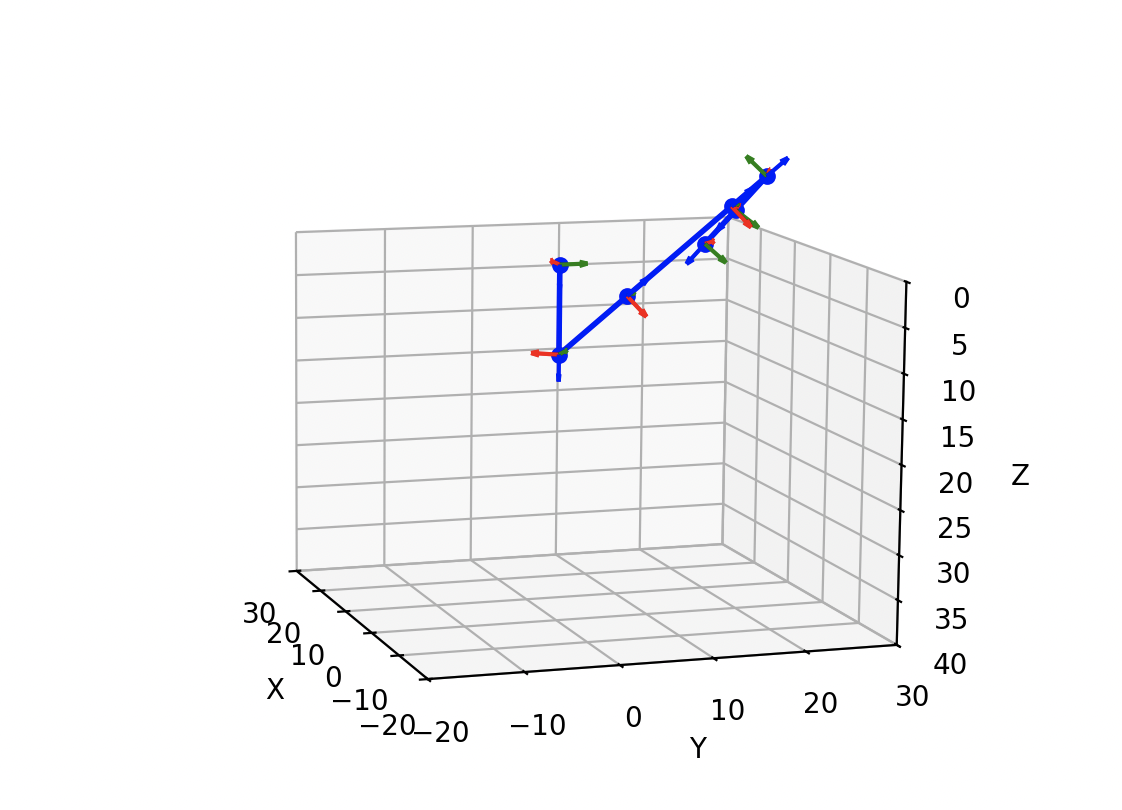